This code is for EN5423 class at GIST, Republic of Korea, and created by Dr. Hyunglok Kim.  
**Contact information**: hyunglokkim@gist.ac.kr  
**License**: This work is licensed for non-commercial use only.  
**Restrictions**: Do not use this material without permission for teaching or developing other classes.

In [14]:
import numpy as np
import pandas as pd
from scipy import stats

In [15]:
# Loading the CSV file
df = pd.read_csv("well_data.csv", na_values=["-"])

# Extracting the columns again after correctly handling "-" values
unfrac = df["Wells in unfractured rock (yi)"].dropna()
frac = df["Wells in fractured rock (yi)"].dropna()

In [16]:
# Shapiro-Wilk test for normality in Python
print("Shapiro-Wilk Normality Test for Unfractured Rock:")
print(stats.shapiro(unfrac))

print("Shapiro-Wilk Normality Test for Fractured Rock:")
print(stats.shapiro(frac))

Shapiro-Wilk Normality Test for Unfractured Rock:
ShapiroResult(statistic=0.6603928804397583, pvalue=0.00035933670005761087)
Shapiro-Wilk Normality Test for Fractured Rock:
ShapiroResult(statistic=0.8853052258491516, pvalue=0.08417537063360214)


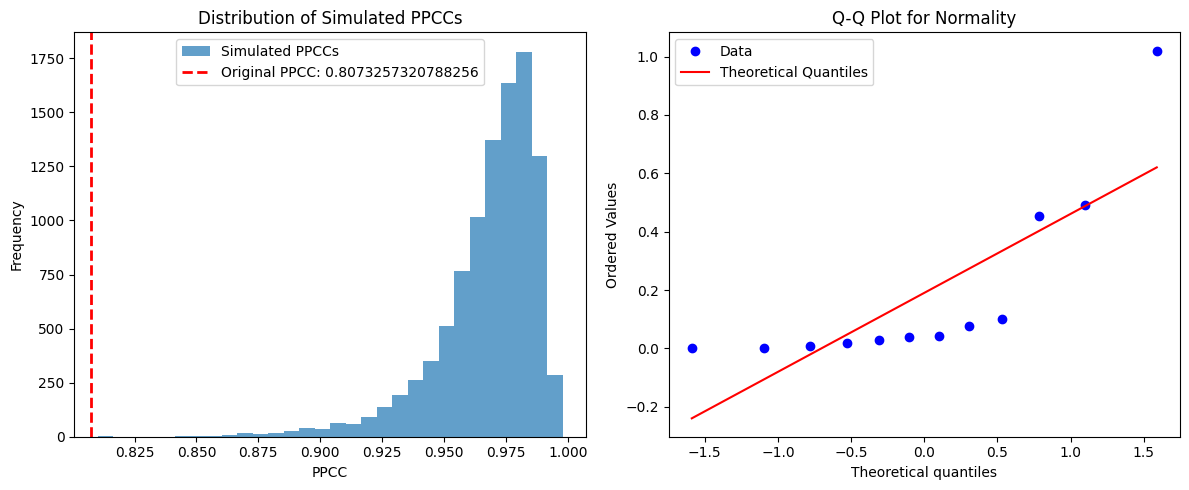

Simulated p-value: 0.0, Alpha: 0.05
H_0 (data is normally distributed) rejected, which means the data is considered to be not normal distribution with the significance level of 0.05, and the p-value is 0.0.


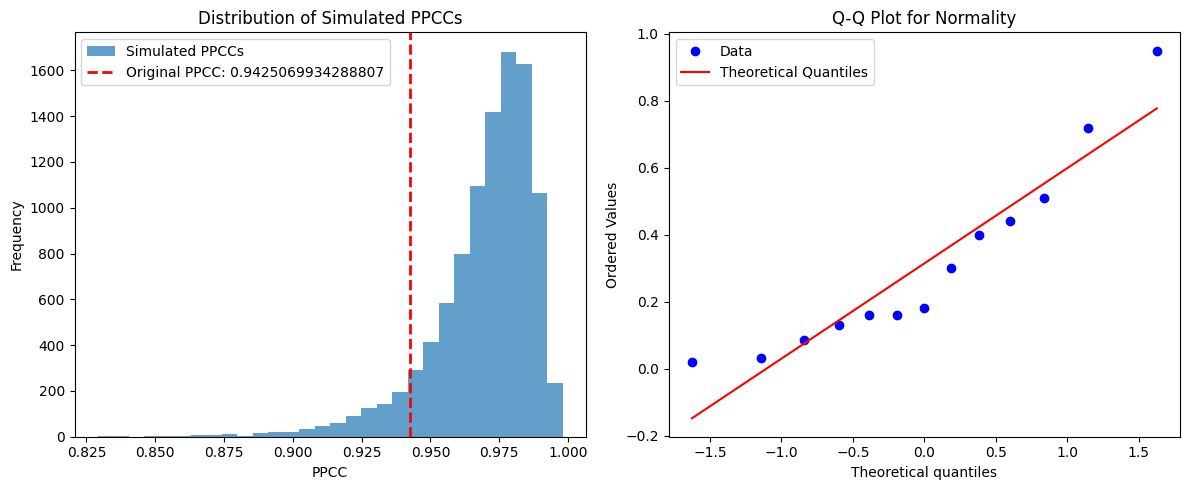

Simulated p-value: 0.082, Alpha: 0.05
H_0 (data is normally distributed) not rejected, indicating the data can be considered normal distribution with the significance level of 0.05, and the p-value is 0.082.


In [49]:
def calculate_ppcc(data):
    """Calculate the Probability Plot Correlation Coefficient (PPCC)."""
    sorted_data = np.sort(data)
    theoretical_quantiles = stats.norm.ppf((np.arange(1, len(data) + 1) - 0.5) / len(data))
    ppcc, _ = stats.pearsonr(sorted_data, theoretical_quantiles)
    return ppcc

def ppcc_test(data, alpha=0.05, num_simulations=10000):
    """Calculate the PPCC, simulate p-value, evaluate against alpha, and plot both simulated PPCC histogram and Q-Q plot."""
    original_ppcc = calculate_ppcc(data)
    simulated_ppccs = []

    for _ in range(num_simulations):
        simulated_data = np.random.normal(np.mean(data), np.std(data), len(data))
        simulated_ppcc = calculate_ppcc(simulated_data)
        simulated_ppccs.append(simulated_ppcc)
    
    p_value = np.sum(np.array(simulated_ppccs) <= original_ppcc) / num_simulations

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    axs[0].hist(simulated_ppccs, bins=30, alpha=0.7, label='Simulated PPCCs')
    axs[0].axvline(original_ppcc, color='r', linestyle='dashed', linewidth=2, label=f'Original PPCC: {original_ppcc}')
    axs[0].set_title('Distribution of Simulated PPCCs')
    axs[0].set_xlabel('PPCC')
    axs[0].set_ylabel('Frequency')
    axs[0].legend()

    stats.probplot(data, dist="norm", plot=axs[1])
    axs[1].set_title('Q-Q Plot for Normality')
    axs[1].legend(['Data', 'Theoretical Quantiles'])

    plt.tight_layout()
    plt.show()

    print(f"Simulated p-value: {p_value}, Alpha: {alpha}")
    if p_value < alpha:
        print(f"H_0 (data is normally distributed) rejected, which means the data is considered to be not normal distribution with the significance level of {alpha}, and the p-value is {p_value}.")
    else:
        print(f"H_0 (data is normally distributed) not rejected, indicating the data can be considered normal distribution with the significance level of {alpha}, and the p-value is {p_value}.")

    return original_ppcc, p_value
    
ppcc, p_value = ppcc_test(unfrac)

ppcc, p_value = ppcc_test(frac)


## HW06 #1 Environmental Study 1: Urban vs. Rural Bird Diversity

**Story**: You are tasked with investigating the impact of urbanization on bird diversity. Your study focuses on comparing the number of bird species found in an urban area with those in a rural setting.

**Toy Data**:
- Urban area bird species count: `[35, 30, 32, 28, 33]`
- Rural area bird species count: `[45, 47, 49, 46, 48]`

**Questions**:

1. **Formulate Hypotheses**:
   - **Null Hypothesis (H0):** `There is no difference in the number of bird species found in urban and rural areas.`
   - **Alternative Hypothesis (HA):** `There is a significant difference in the number of bird species found in urban and rural areas.`
   
2. **Select an Alpha Value**:
   - Choose an appropriate alpha (α) level for your test and explain your choice. A common choice is `α = 0.05`, but justify why you might choose this or a different value based on the context of the environmental study.
   
3. **Conduct a Rank-Sum Test**:
   - Using the provided toy data, perform a rank-sum test to determine if there is a significant difference in bird species diversity between urban and rural areas. Here's a hint on how to start:
  
4. **Discussion**
   - Based on the p-value and your chosen alpha level, determine whether to reject or fail to reject the null hypothesis. Discuss what this means in the context of urbanization's impact on bird diversity.

```python
from scipy.stats import ranksums

# Urban and rural bird species counts
urban_species = [35, 30, 32, 28, 33]
rural_species = [45, 47, 49, 46, 48]

# Perform a rank-sum test
stat, p_value = ranksums(urban_species, rural_species)

# Output the result
print(f"Statistic: {stat}, P-value: {p_value}")

## HW06 #2 Environmental Study 2: Effectiveness of New Water Filtration System

**Story**: An environmental engineer has developed a new water filtration system designed to reduce pollution in industrial wastewater. The effectiveness of this system is tested by measuring the concentration of a specific pollutant before and after treatment.

**Toy Data**:
- Pollutant concentration before treatment (mg/L): `[10.5, 11.2, 10.8, 11.0, 11.3]`
- Pollutant concentration after treatment (mg/L): `[5.1, 4.8, 5.0, 4.9, 5.2]`

**Questions**:

1. **Formulate Hypotheses**:
   - **Null Hypothesis (H0):** `The new water filtration system does not ??.`
   - **Alternative Hypothesis (HA):** `The new water filtration system ?? the pollutant concentration.`
   
2. **Select an Alpha Value**:
   - Choose an appropriate alpha (α) level for your test and explain your choice.
   
3. **Conduct a Bootstrap Test**:
   - Perform bootstrapping to compare the means before and after treatment, and calculate the p-value.

4. **Discussion**
   - Discuss the implications of your findings for industrial wastewater treatment.

```python
# Hint: Use numpy to generate bootstrap samples and calculate the difference in means.


## HW06 #3 Environmental Study 3: Air Quality Improvement After Traffic Regulation

**Story**: A city implements a new traffic regulation policy to reduce vehicle emissions. The effectiveness of this policy is evaluated by comparing Air Quality Index (AQI) values before and after its implementation.

**Toy Data**:
- AQI before policy implementation: `[75, 80, 82, 78, 77]`
- AQI after policy implementation: `[65, 63, 67, 64, 66]`

**Questions for Students**:

1. **Formulate Hypotheses**:
   - **Null Hypothesis (H0):** `The traffic regulation policy has no ?? Air Quality Index (AQI).`
   - **Alternative Hypothesis (HA):** `The traffic regulation policy improves ??.`
   
2. **Select an Alpha Value**:
   - Choose an appropriate alpha (α) level for your test and explain your choice.
   
3. **Perform a Rank Sum Test**:
   - Use the rank sum test to compare AQI values before and after the policy implementation.

4. **Discussion**
   - Analyze the environmental impact of traffic regulation policies based on your findings.
```python
# Hint: scipy.stats.ranksums can be used for this comparison.

## HW06 #4 Environmental Study 4: Effect of Reforestation on Local Temperature

**Story**: A large-scale reforestation project is initiated to assess its impact on local temperature, hypothesizing that increased tree cover could lead to lower temperatures.

**Toy Data**:
- Local temperature (°C) before reforestation: `[32, 31.5, 33, 32.5, 31]`
- Local temperature (°C) after reforestation: `[30, 29.5, 30.5, 29, 30]`

**Questions**:

1. **Formulate Hypotheses**:
   - **Null Hypothesis (H0):** `Reforestation has no significant ??`
   - **Alternative Hypothesis (H1):** `Reforestation leads to a significant ??.`
   
2. **Select an Alpha Value**:
   - Choose an appropriate alpha (α) level for your test and explain your choice.
   
3. **Conduct a Bootstrap Test**:
   - Perform bootstrapping to evaluate the difference in temperature means before and after reforestation. Consider creating bootstrap samples of the mean difference and calculating the proportion of samples that show a significant difference as your p-value.

4. **Discussion**
   - Discuss the implications of your findings for climate change mitigation strategies and local ecosystem health.

```python
# Hint: Use numpy to create bootstrap samples of the temperature data.
# Calculate the differences in means from the bootstrap samples.
# Estimate the p-value based on the bootstrap differences.


## HW06 #5 Environmental Study 5: Comparing Soil Quality in Organic vs. Conventional Farms

**Story**: To explore the impacts of farming practices on soil health, this study compares the nitrogen content of soil from organic farms to that from conventional farms. It is posited that organic farming practices, which avoid synthetic fertilizers, may lead to higher soil nitrogen content due to enhanced natural nutrient cycles.

**Toy Data**:
- Nitrogen content in organic farms (%): `[2.1, 2.3, 2.4, 2.2, 2.5]`
- Nitrogen content in conventional farms (%): `[1.8, 1.9, 2.0, 1.7, 1.9]`

**Questions**:

1. **Formulate Hypotheses**:
   - **Null Hypothesis (H0):** `There is ?? in soil nitrogen content between ??.`
   - **Alternative Hypothesis (H1):** `Organic farms have a significantly higher ??.`

2. **Select an Alpha Value**:
   - Choose an appropriate alpha (α) level for your hypothesis test. Explain why you selected this value. Common practice is to use `α = 0.05`, but depending on the context and the consequences of Type I or Type II errors, a different alpha value might be more appropriate.

3. **Perform a Rank Sum Test**:
   - To compare the nitrogen content between soils from organic and conventional farms, apply a rank sum test. This non-parametric test is suitable as it does not assume normal distribution of the data.
  
4. **Discussion**
   - With the p-value obtained from the rank sum test and your chosen alpha level, decide whether to reject or fail to reject the null hypothesis. Discuss what your decision implies about the impact of organic farming practices on soil nitrogen content. Consider the broader implications for soil health, plant growth, and ecosystem sustainability.

```python
# Import the necessary library
from scipy.stats import ranksums

# Toy data for nitrogen content
organic_farms = [2.1, 2.3, 2.4, 2.2, 2.5]
conventional_farms = [1.8, 1.9, 2.0, 1.7, 1.9]

# Conduct the rank sum test
stat, p_value = ranksums(organic_farms, conventional_farms)

# Output the test statistics and p-value
print(f"Rank Sum Test Statistic: {stat}, P-value: {p_value}")
